# import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# load the dataset

In [2]:
df = pd.read_csv("Obesity Classification.csv")

# explore the data set

In [5]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [9]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


# encode categorical columns

In [11]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

In [13]:
le_label = LabelEncoder()
df['Label'] = le_label.fit_transform(df['Label'])

# prepare features and target

In [15]:
X = df[['Age', 'Gender', 'Height', 'Weight', 'BMI']]
y = df['Label']

# splitting into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# train the randomforest classifier

In [19]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# make predictions and evaluate the model

In [21]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



# visualize class distribution

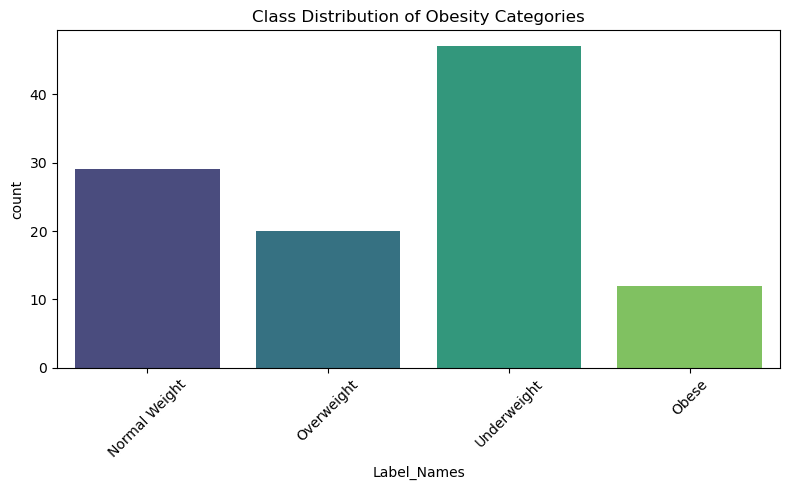

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Label_Names'] = le_label.inverse_transform(df['Label'])

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Label_Names', palette='viridis')
plt.title('Class Distribution of Obesity Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# plot confusion matrix

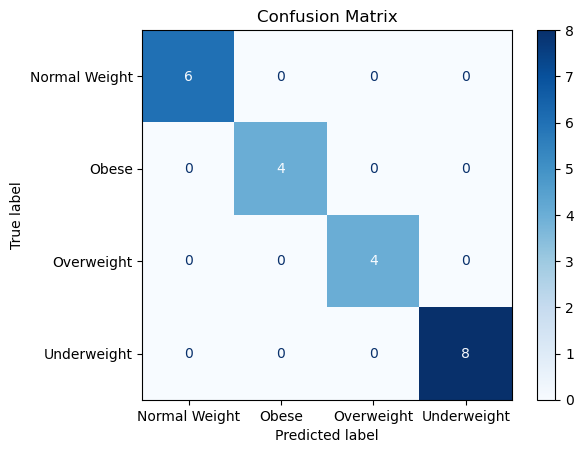

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_label.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# feature importance

In [14]:
import pandas as pd

feature_names = X_train.columns
feature_importances = clf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


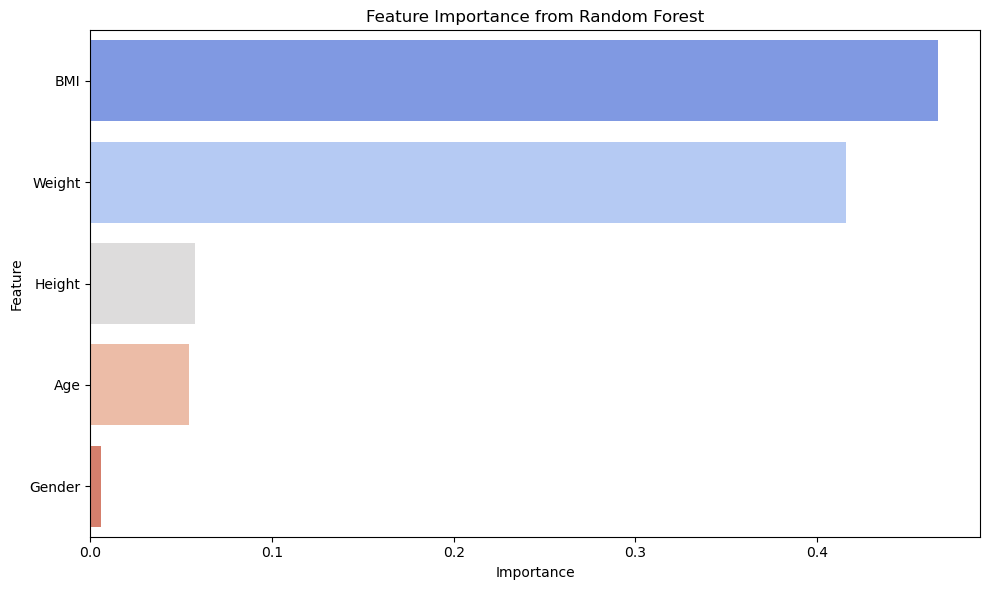

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    palette='coolwarm'
)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# trying another classifier 

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000)

# cross validation

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print("Random Forest Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


Random Forest Cross-Validation Accuracy Scores: [0.86363636 1.         1.         1.         1.        ]
Mean Accuracy: 0.9727272727272727


# ann

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_encoded = le.fit_transform(y)  
y_categorical = to_categorical(y_encoded)  

X_scaled = scaler.fit_transform(X)  

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


C:\Users\ideal\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.3185 - loss: 1.3869 - val_accuracy: 0.5000 - val_loss: 1.3188
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3987 - loss: 1.3111 - val_accuracy: 0.5000 - val_loss: 1.2723
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4320 - loss: 1.2839 - val_accuracy: 0.5000 - val_loss: 1.2345
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5416 - loss: 1.2432 - val_accuracy: 0.5556 - val_loss: 1.2027
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5880 - loss: 1.1787 - val_accuracy: 0.5556 - val_loss: 1.1717
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5949 - loss: 1.1547 - val_accuracy: 0.5556 - val_loss: 1.1435
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6135 - loss: 1.1234 - val_accuracy: 0.5556 - val_loss: 1.1177
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6438 - loss: 1.0829 - val_accuracy: 0.5556 - val_loss: 1.0925

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_prob = model.predict(X_test)
y_pred_ann = (y_pred_prob > 0.5).astype(int)

y_pred_ann = y_pred_ann.ravel()
y_test = y_test.ravel()

print("ANN Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))
print("Classification Report:\n", classification_report(y_test, y_pred_ann))



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
ANN Evaluation:
Accuracy: 0.9407894736842105
Confusion Matrix:
 [[110   4]
 [  5  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       114
           1       0.89      0.87      0.88        38

    accuracy                           0.94       152
   macro avg       0.92      0.92      0.92       152
weighted avg       0.94      0.94      0.94       152

